### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2021 Semester 2

## Assignment 1

**Student Name:**    `Yingpeng Tan`

**Student ID:**     `739 674`

This iPython notebook is a template which you should use for your Assignment 1 submission. This file should be submitted at the **Assignment 1: Code** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a writren report explaining your results at the **Assignment 1: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. Mapping between world and image coordinates
Note: Writing code for this question is optional. However, if you do not include code here you *must* show your computation steps in your written report.

### 2. Secret messages with bandpass filters

In [ ]:
import os
import numpy as np
import cv2  
from matplotlib import pyplot as plt

In [ ]:
# This Code was developted on Goolge Colab. Please REMOVE this cell if you are running it locally.
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Code was developted on Goolge Colab. Please REMOVE this cell if you are running it locally.
# Mount Selected Folder in Google Drive
import os
os.chdir("/content/drive/My Drive/COMP90086_CV_Ass1") 

In [ ]:
# Load Two Images A and B

rootpath='./'
imgA= cv2.imread(os.path.join(rootpath, "COMP90086_CV_Ass1_Q2_ImgA.jpg"),cv2.IMREAD_GRAYSCALE) 
imgB= cv2.imread(os.path.join(rootpath, "COMP90086_CV_Ass1_Q2_ImgB_2.jpg"),cv2.IMREAD_GRAYSCALE) 

'''
plt.imshow(imgA ,cmap='gray')  
plt.title('Image A: Original')
plt.axis('off')
plt.show()

plt.imshow(imgB ,cmap='gray')  
plt.title('Image B: Original')
plt.axis('off')
plt.show()
'''

"\nplt.imshow(imgA ,cmap='gray')  \nplt.title('Image A: Original')\nplt.axis('off')\nplt.show()\n\nplt.imshow(imgB ,cmap='gray')  \nplt.title('Image B: Original')\nplt.axis('off')\nplt.show()\n"

In [ ]:
# Apply Fast Fourier Transform on Image A and B to get the image in Fourier domain
fA = np.fft.fft2(imgA)
fA = np.fft.fftshift(fA)

fB = np.fft.fft2(imgB)
fB = np.fft.fftshift(fB)

In [ ]:
def Gauss_HighPass(f,radius_high): 

# This function was modified based on Q4 in worksheet03.ipynb for 
# Week 3 Workshop: Spatial filtering & Frequency filtering, 
# COMP90086 Computer Vision, UniMelb 

    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
  
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = 1 - np.exp((-1)*dis**2/2/(radius_high**2)) 
            # The Sum of Mask of Gauss HighPass Filter and Mask of Gauss LowPass Filter is 1
    
    result = np.multiply(f, mask) 
    return result,mask

In [ ]:
def Gauss_LowPass(f,radius_low): 

# This function was modified based on Q4 in worksheet03.ipynb for 
# Week 3 Workshop: Spatial filtering & Frequency filtering, 
# COMP90086 Computer Vision, UniMelb 

    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
  
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = np.exp((-1)*dis**2/2/(radius_low**2)) 
            # The Sum of Mask of Gauss HighPass Filter and Mask of Gauss LowPass Filter is 1
    
    result = np.multiply(f, mask) 
    return result,mask

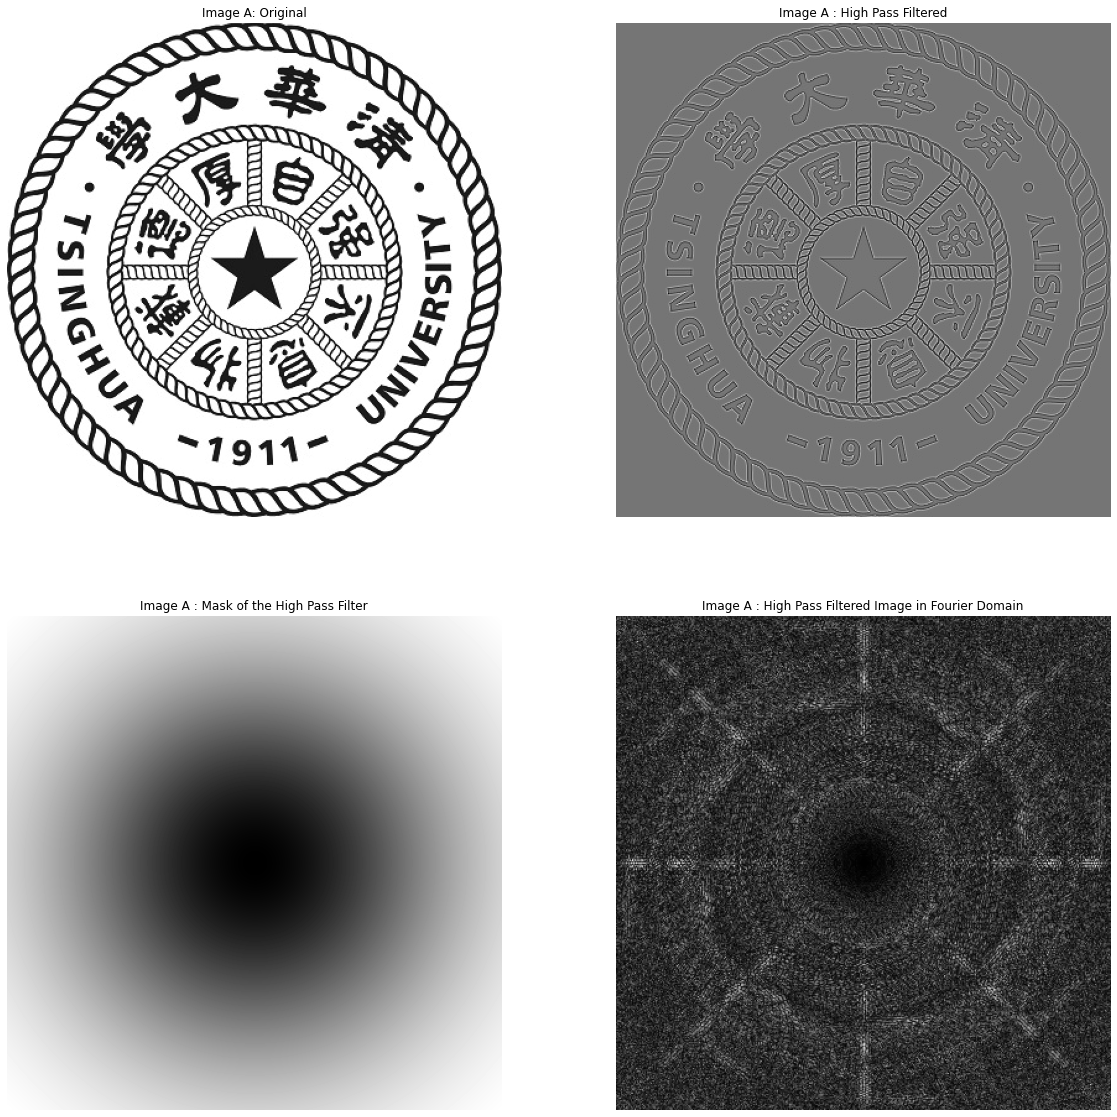

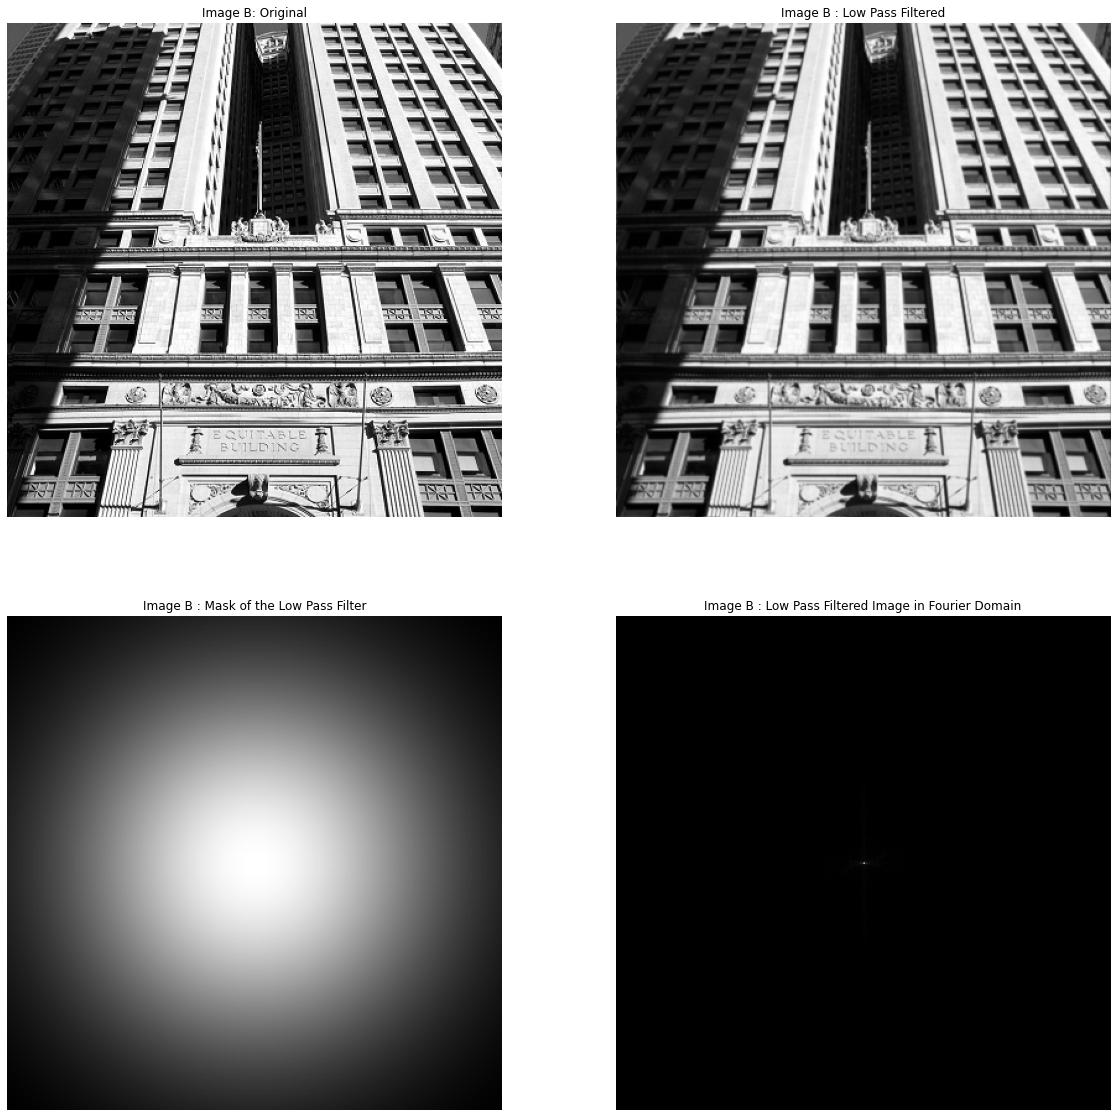

In [ ]:
# Set the threshold for High and Low Pass filter
radius_high= 115
radius_low= 105

# Apply the High and Low pass filter on the image A and B in the Fourier Domain
fA_high_filtered, mask_high = Gauss_HighPass(fA, radius_high)
fB_low_filtered, mask_low = Gauss_LowPass(fB, radius_low)

# Apply Reverse Fourier transform to obtain the high and low filtered image in spatial domain
imgA_high = np.real(np.fft.ifft2(np.fft.fftshift(fA_high_filtered)))
imgB_low = np.real(np.fft.ifft2(np.fft.fftshift(fB_low_filtered)))

# Show the Orginal Image of A
fig,axs = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(20)
plt.subplot(2,2,1)
plt.imshow(imgA ,cmap='gray')  
plt.title('Image A: Original')
plt.axis('off')

# Show the High Pass Filtered Image of A
fig.set_figwidth(20)
fig.set_figheight(20)
plt.subplot(2,2,2)
plt.imshow(imgA_high ,cmap='gray')  
plt.title('Image A : High Pass Filtered')
plt.axis('off')

# Show the Mask of the High Pass Filter
plt.subplot(2,2,3)
plt.imshow(mask_high ,cmap='gray')  
plt.title('Image A : Mask of the High Pass Filter')
plt.axis('off')

# Show the High Pass Filtered Image in Fourier Domain
plt.subplot(2,2,4)
plt.imshow(np.abs(fA_high_filtered),cmap='gray')  
plt.title('Image A : High Pass Filtered Image in Fourier Domain')
plt.axis('off')
plt.show()

# Show the Orginal Image of B
fig,axs = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(20)
plt.subplot(2,2,1)
plt.imshow(imgB ,cmap='gray')  
plt.title('Image B: Original')
plt.axis('off')

# Show the Low Pass Filtered Image of B
fig.set_figwidth(20)
fig.set_figheight(20)
plt.subplot(2,2,2)
plt.imshow(imgB_low ,cmap='gray')  
plt.title('Image B : Low Pass Filtered')
plt.axis('off')

# Show the Mask of the Low Pass Filter
plt.subplot(2,2,3)
plt.imshow(mask_low ,cmap='gray')  
plt.title('Image B : Mask of the Low Pass Filter')
plt.axis('off')

# Show the Low Pass Filtered Image in Fourier Domain
plt.subplot(2,2,4)
plt.imshow(np.abs(fB_low_filtered),cmap='gray')  
plt.title('Image B : Low Pass Filtered Image in Fourier Domain')
plt.axis('off')

plt.show()

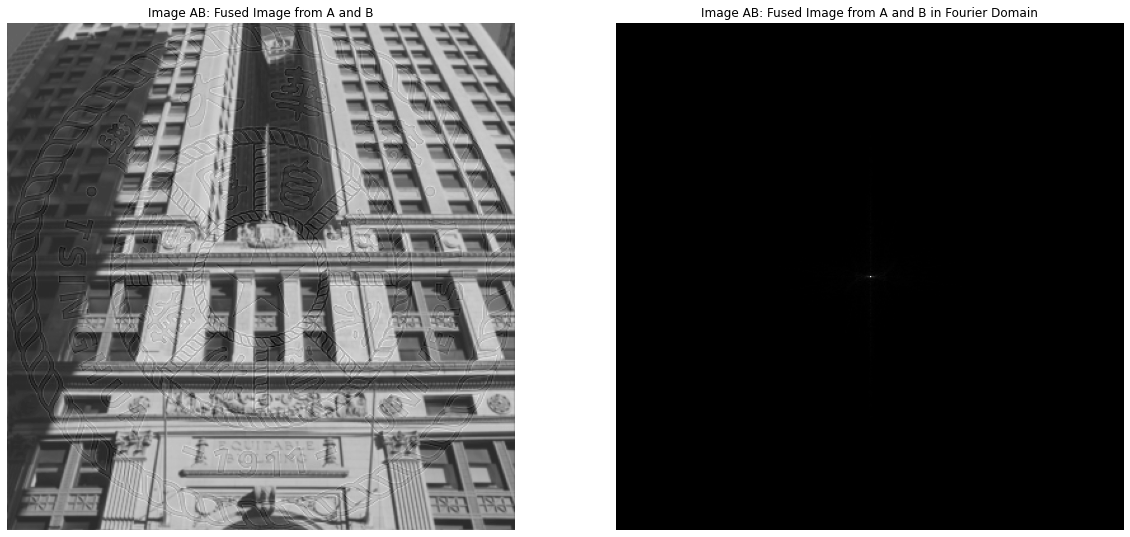

In [ ]:
# Sum the images in Fourier domain to obtain the fused image
fAB = fA_high_filtered + fB_low_filtered

# Apply Reverse Fourier transform to get the fused image in spatial domain
imgAB = np.real(np.fft.ifft2(np.fft.fftshift(fAB)))

# Show the fused image AB in Spatial domain
fig,axs = plt.subplots(1,1)
fig.set_figwidth(20)
fig.set_figheight(20)
plt.subplot(1,2,1)
plt.imshow(imgAB ,cmap='gray')  
plt.title('Image AB: Fused Image from A and B')
plt.axis('off')

# Show the fused image AB in Fourier domain
plt.subplot(1,2,2)
plt.imshow(np.abs(fAB),cmap='gray')  
plt.title('Image AB: Fused Image from A and B in Fourier Domain')
plt.axis('off')
plt.show()

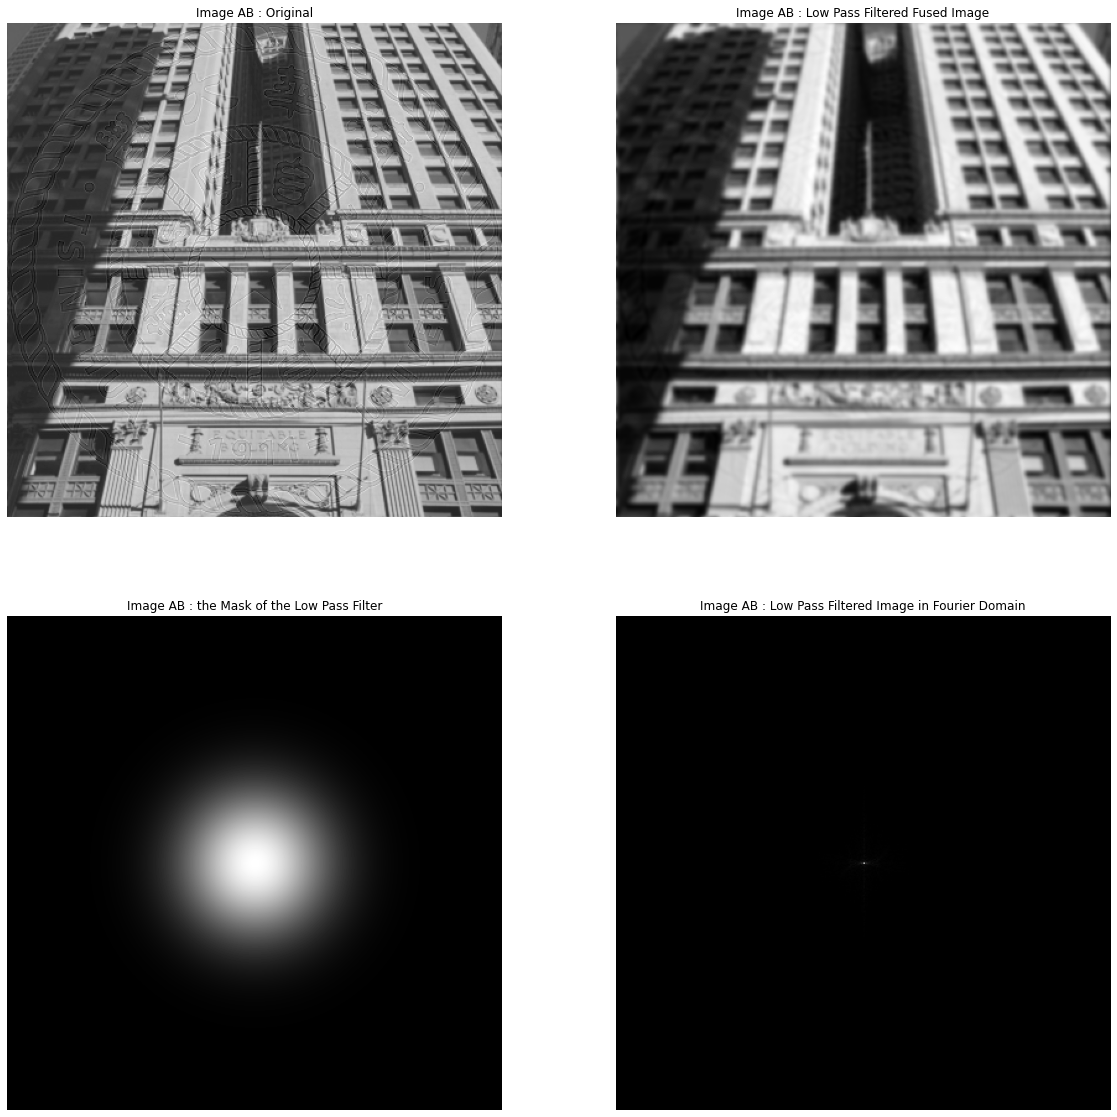

In [ ]:
# The threshold for the second low pass filter to simulate looking from far way
radius_low_2 = 40

# Apply the second low pass filter to simulate looking from far way on the Fourier Domain
fAB_low_filtered, mask_low_2 = Gauss_LowPass(fAB, radius_low_2)

# Apply Reverse Fourier transform to get the low pass filtered image in Spatial Space
imgAB_low_filtered = np.real(np.fft.ifft2(np.fft.fftshift(fAB_low_filtered)))

# Show the Original Image Fused AB
fig,axs = plt.subplots(1,2)

fig.set_figwidth(20)
fig.set_figheight(20)
plt.subplot(2,2,1)
plt.imshow(imgAB ,cmap='gray') 
plt.title('Image AB : Original')
plt.axis('off')

# Show the Low Pass Filtered Image of AB
fig.set_figwidth(20)
fig.set_figheight(20)
plt.subplot(2,2,2)
plt.imshow(imgAB_low_filtered ,cmap='gray')  
plt.title('Image AB : Low Pass Filtered Fused Image')
plt.axis('off')

# Show the Mask of the Low Pass Filter
plt.subplot(2,2,3)
plt.imshow(mask_low_2 ,cmap='gray')  
plt.title('Image AB : the Mask of the Low Pass Filter')
plt.axis('off')

# Show the Low Pass Filtered Image in Fourier Domain
plt.subplot(2,2,4)
plt.imshow(np.abs(fAB_low_filtered),cmap='gray')  
plt.title('Image AB : Low Pass Filtered Image in Fourier Domain')
plt.axis('off')

plt.show()